### Name: Shreya Dajgude
### GRIP- The Sparks Foundation Internship- JUNE 2022¶
#### Data Science and Business Analytics Intern

#### Task 1: Prediction using Supervised Machine Learning Algorithm (Simple Linear Regression)
Predict the percentage of a student based on the number of study hours

#### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Understanding and Exploration

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Shape of dataset

In [6]:
data.shape

(25, 2)

#### Find the datatypes in the dataset

In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

#### List of columns in the dataset

In [8]:
data.columns.tolist()

['Hours', 'Scores']

#### Missing values in the dataset

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Summary of the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Statistical data from the dataset

In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Find the Duplicate values from the dataset

In [12]:
data.duplicated().sum()

0

#### Finding the Correlation

In [13]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Plotting the correlations on heatmap

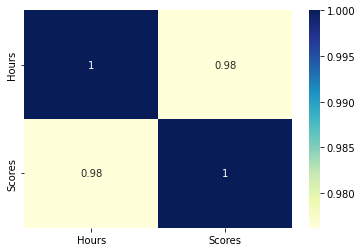

In [14]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Scatter Plot to find the relationship between Hours studied vs Percentage Score

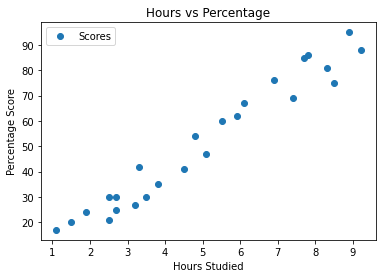

In [15]:
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

We can see that there is a Linear Relationship between Score and Hours.

#### Preparing the data: Dividing the dataset into Dependent and Independent features

In [21]:
X = pd.DataFrame(data['Hours'])
y = pd.DataFrame(data['Scores'])

#### Splitting the dataset into training and testing data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Shape of the train and test data

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20, 1)
(5, 1)


#### Train the Algorithm

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

#### Find the Intercept

In [25]:
print(reg.intercept_)

[2.01816004]


#### Find the Slope

In [26]:
print(reg.coef_)

[[9.91065648]]


#### Plotting the Regression Line

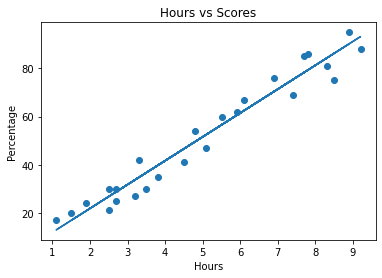

In [28]:
line = reg.coef_*X + reg.intercept_
plt.scatter(X,y)
plt.plot(X, line)
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

#### Predicted Value

In [29]:
y_pred = reg.predict(X_test)

In [37]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [38]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62


#### Predicted score if a student studies for 9.5 hrs/day?

In [35]:
Percentage_Score = reg.predict(np.array([[9.5]]))
print('Number of Hours studied : 9.5 hrs/day')
print(f'Percentage Score : {Percentage_Score}')

Number of Hours studied : 9.5 hrs/day
Percentage Score : [[96.16939661]]


#### Finding the accuracy of the model

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean squared Error: 21.598769307217456


In [40]:
print('Estimated Training and Testing score')
print(f'Training score : {round(reg.score(X_train,y_train),3)}')
print(f'Testing score : {round(reg.score(X_test,y_test),3)}')

Estimated Training and Testing score
Training score : 0.952
Testing score : 0.945


In [42]:
from sklearn.metrics import r2_score
print(f'R-Squared Score : {round(r2_score(y_test,y_pred),3)}')

R-Squared Score : 0.945
